# KNN

[slides](https://www.cs.cmu.edu/~hchai2/courses/10701/lectures/Lecture3.pdf)

## Example from lecture

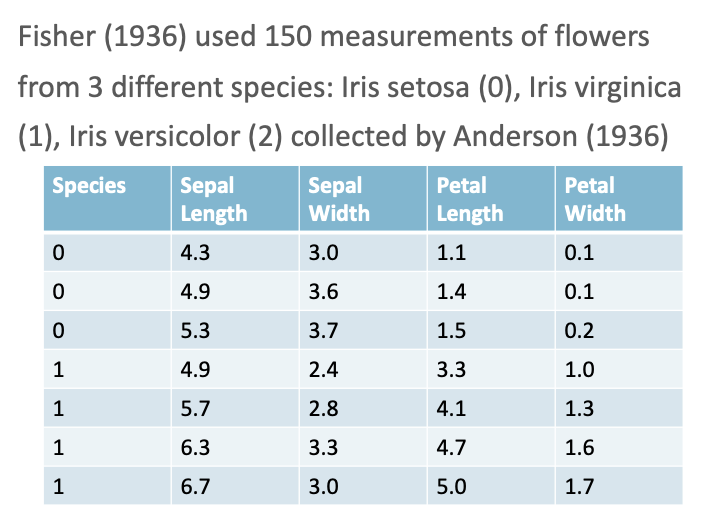

In [151]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [152]:
iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Species'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [153]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


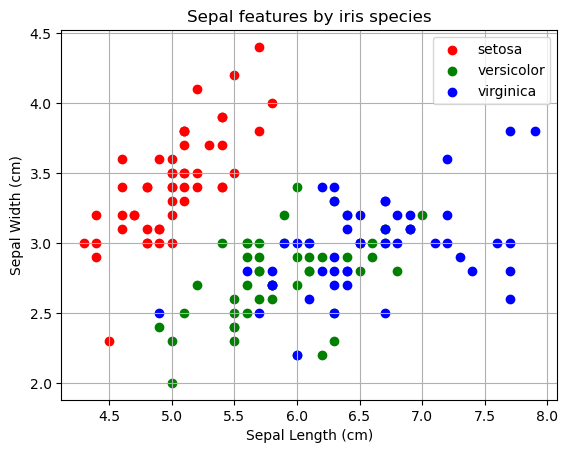

In [154]:
names = ['setosa', 'versicolor', 'virginica']
colors = ['red', 'green', 'blue']

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal features by iris species')
plt.grid(True)

for i, (name, color) in enumerate(zip(names, colors)):
    subset = df[df['Species'] == i]
    plt.scatter(
        subset['sepal length (cm)'],
        subset['sepal width (cm)'],
        color=color,
        label=name,
    )
    
plt.legend()
plt.show()

## Euclidian distance

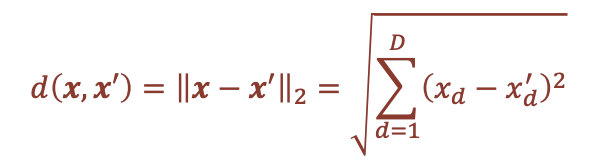

In [155]:
def euclidian_distance(x, x_prime):
    return np.sqrt(np.sum(np.power(x - x_prime, 2), axis=1))

## Manhattan distance

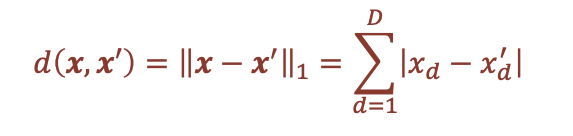

In [156]:
def manhattan_distance(x, x_prime):
    return np.sum(np.abs(x - x_prime))

## Nearest neighbor model

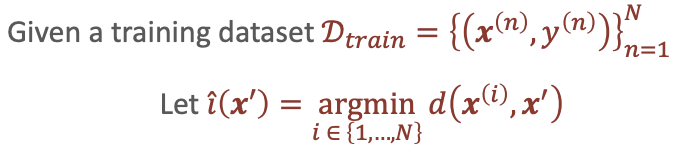

In [157]:
def i_hat(x_prime, X):
    distances = euclidian_distance(X, x_prime)
    return np.argmin(distances)


## Classifier

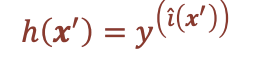

In [158]:
def nearest_neighbor_classifier(x_prime, X, Y):
    nearest_idx = i_hat(x_prime, X)
    try:
        return Y.iloc[nearest_idx]  # works if Y is a pandas Series
    except AttributeError:
        return Y[nearest_idx]       # fallback for NumPy arrays

Starting with only 2d

In [159]:
X = df[['sepal length (cm)', 'sepal width (cm)']]
Y= df['Species']

In [160]:
def plot_decision_boundary(X, Y, classifier_fn, class_labels=None, h=0.05, title='Decision Boundary'):
    X = np.asarray(X)
    Y = np.asarray(Y)
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Predict over grid
    Z = np.array([classifier_fn(point, X, Y) for point in grid_points])
    Z = Z.reshape(xx.shape)

    # Plot decision regions
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)

    # Scatter original points
    unique_classes = np.unique(Y)
    colors = ['red', 'green', 'blue', 'purple', 'orange']
    for i, cls in enumerate(unique_classes):
        label = class_labels[cls] if class_labels is not None else str(cls)
        plt.scatter(X[Y == cls, 0], X[Y == cls, 1], label=label, c=colors[i % len(colors)])

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

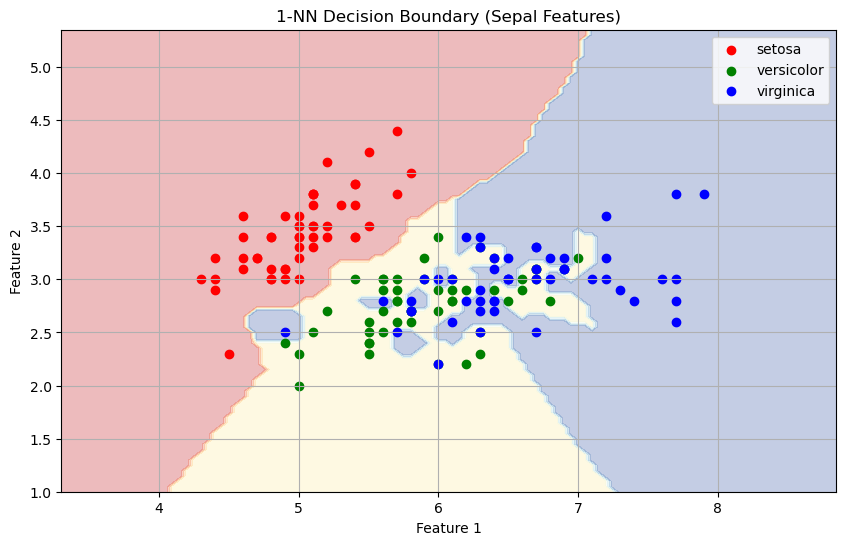

In [161]:
plot_decision_boundary(X, Y, nearest_neighbor_classifier, class_labels=iris.target_names, title="1-NN Decision Boundary (Sepal Features)")

In [162]:
def evaluate_accuracy(X_train, Y_train, X_test, Y_test, classifier_fn):
    Y_pred = []
    for i, (_, x) in enumerate(X_test.iterrows()):
        try:
            pred = classifier_fn(x, X_train, Y_train)
            Y_pred.append(pred)
        except Exception as e:
            print(f"\n🔍 Error at test index {i}")
            print("x =", x)
            print("Type of x:", type(x))
            print("Values in x:", list(x))
            raise e
    return accuracy_score(Y_test, Y_pred)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

acc = evaluate_accuracy(X_train, Y_train, X_test, Y_test, nearest_neighbor_classifier)
print(f"Accuracy: {acc:.2%}")

Accuracy: 80.00%


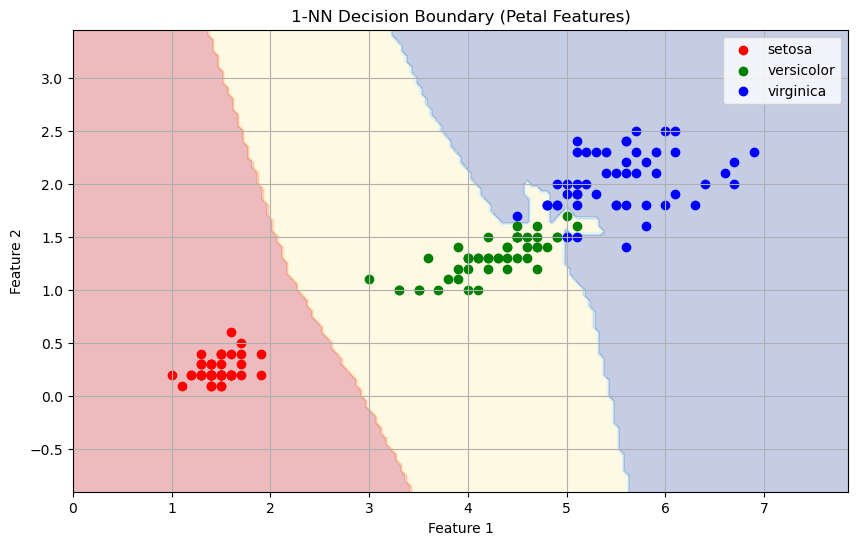

In [164]:
X = df[['petal length (cm)', 'petal width (cm)']]

plot_decision_boundary(
    X, 
    Y, 
    nearest_neighbor_classifier, 
    class_labels=iris.target_names, 
    title="1-NN Decision Boundary (Petal Features)"
)

In [165]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

acc = evaluate_accuracy(X_train, Y_train, X_test, Y_test, nearest_neighbor_classifier)
print(f"Accuracy: {acc:.2%}")

Accuracy: 100.00%


Interesting we get 100% accuracy with the petal features... let's try using all four features for fun


In [166]:
X = df.drop('Species', axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

acc = evaluate_accuracy(X_train, Y_train, X_test, Y_test, nearest_neighbor_classifier)
print(f"Accuracy: {acc:.2%}")

Accuracy: 100.00%
